In [18]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [19]:
RESULT_URL = "https://huggingface.co/henryscheible/experiment_results/raw/main/results_2022-10-24%2018%3A08%3A29.725573.json"

In [20]:
data = json.loads(requests.get(RESULT_URL).text)

In [21]:
data.keys()

dict_keys(['stereoset_binary_bert_classifieronly', 'stereoset_binary_bert_finetuned'])

In [22]:
checkpoints = [
    "stereoset_binary_bert_finetuned",
    "stereoset_binary_bert_classifieronly"
]
suffixes = [
    "250",
    "500",
    "750",
]

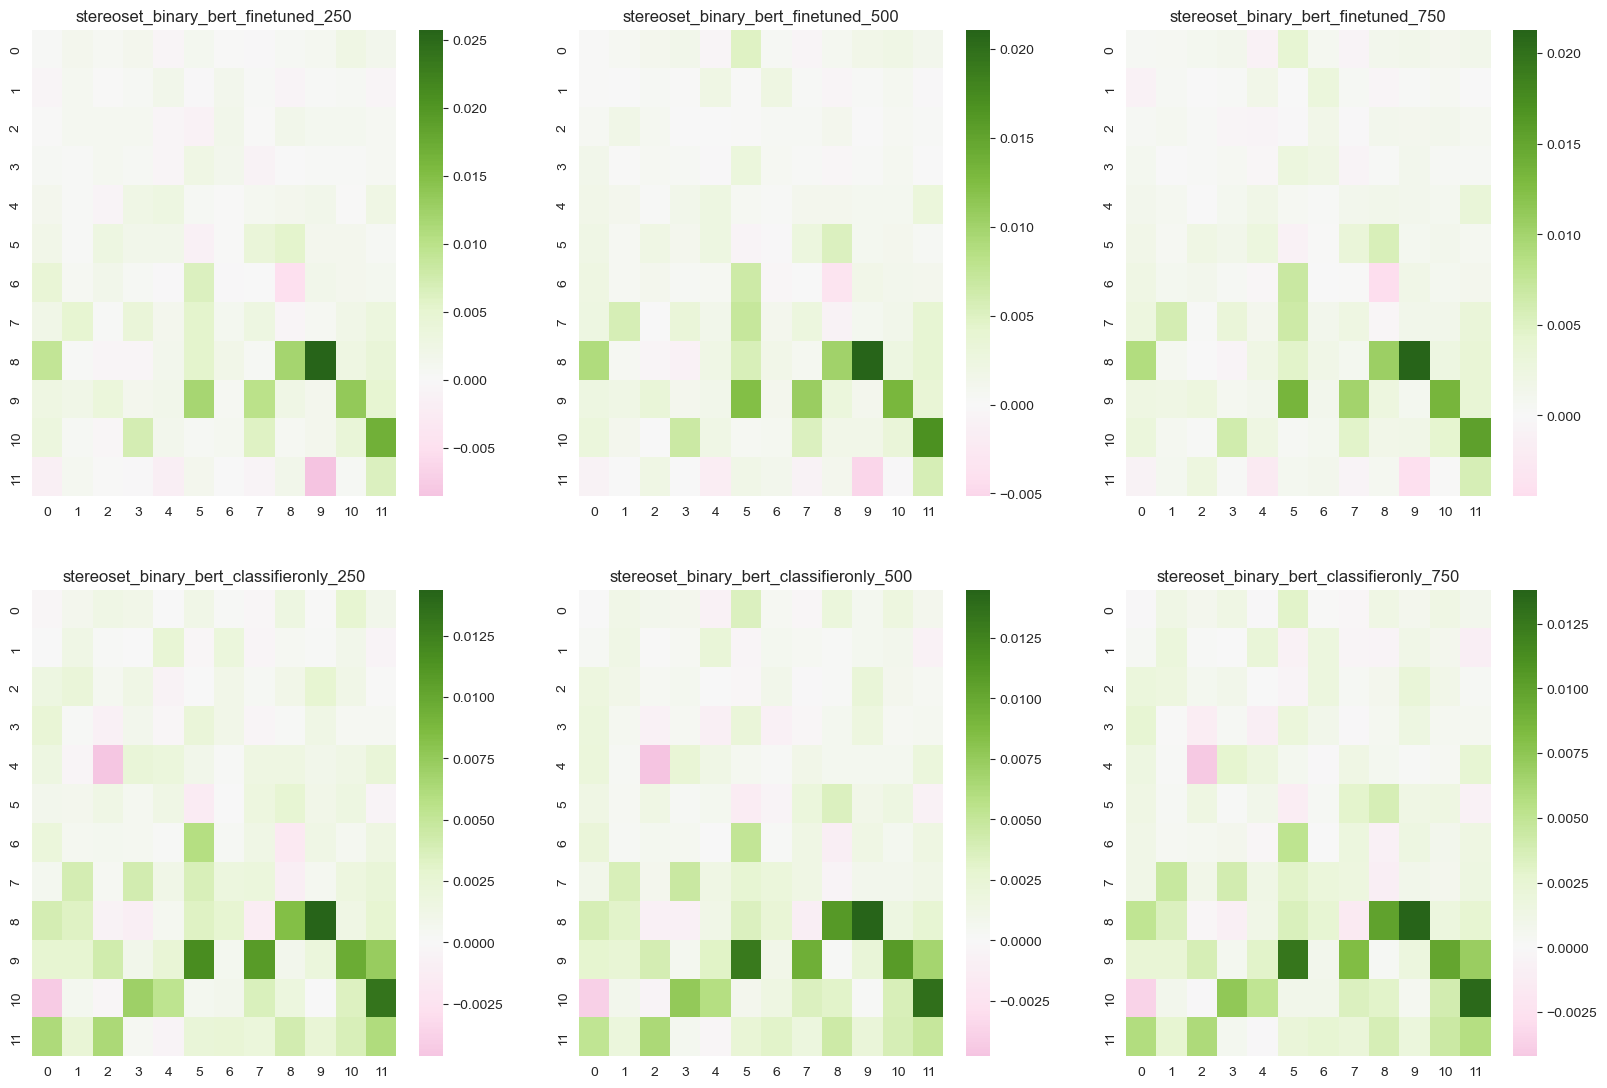

In [23]:
fig = plt.figure(figsize=(20, 20*2/3))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(len(checkpoints), len(suffixes), len(suffixes)*i+j+1)
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.heatmap(np.array(data[checkpoint][suffix]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0)
plt.show()

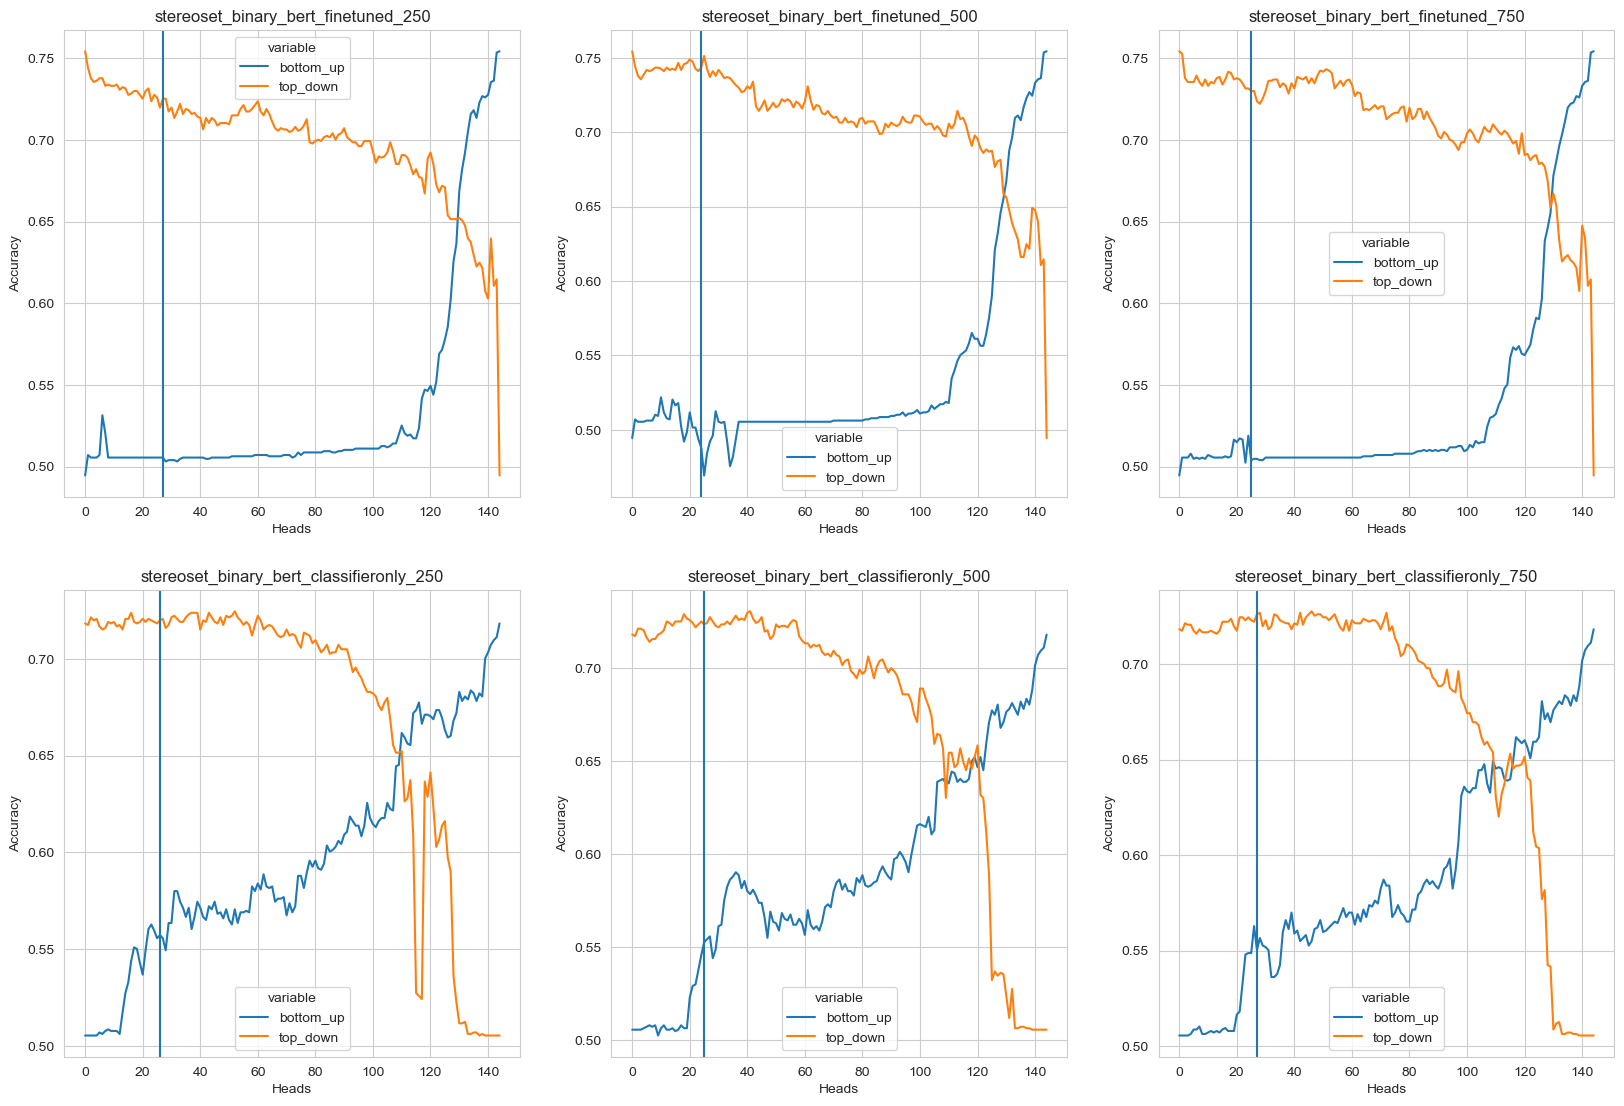

In [24]:
fig = plt.figure(figsize=(20, 20*2/3))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(len(checkpoints), len(suffixes), len(suffixes)*i+j+1)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up': data[checkpoint][suffix]["bottom_up_results"],
            'top_down': data[checkpoint][suffix]["top_down_results"]
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)
plt.show()

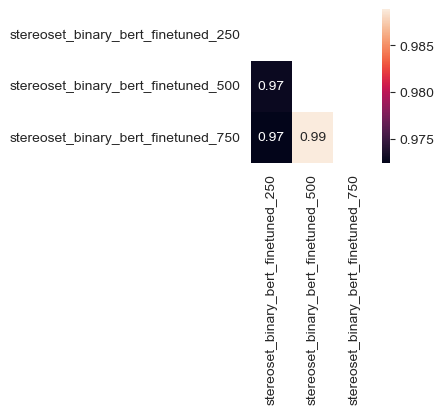

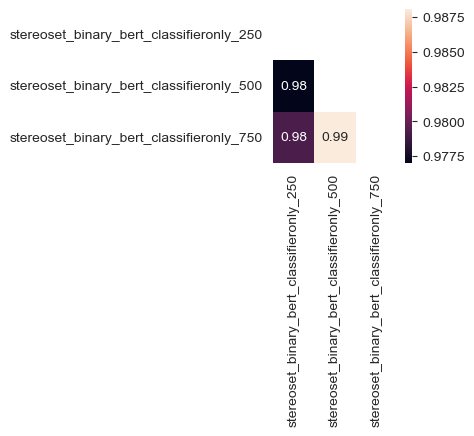

In [41]:
# fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    fig = plt.figure(figsize=(2, 2))
    df = pd.DataFrame({f"{checkpoint}_{suffix}": data[checkpoint][suffix]["contribs"] for suffix in suffixes})
    mask = np.triu(np.ones((3,3)))
    # ax = fig.add_subplot(len(checkpoints), 1, i+1)
    sns.heatmap(df.corr(), mask=mask, annot=True)
    plt.show()

In [26]:
# Pull Random Seed Robustness Results
data_random_seed = json.loads(requests.get("https://huggingface.co/henryscheible/experiment_results/raw/main/results_2022-11-01%2016%3A08%3A46.493893.json").text)

In [27]:
checkpoints_random_seed = [
    'stereoset_binary_bert_classifieronly',
    'stereoset_binary_bert_finetuned'
]

suffixes_random_seed = [
    '0',
    '1',
    '2'
]

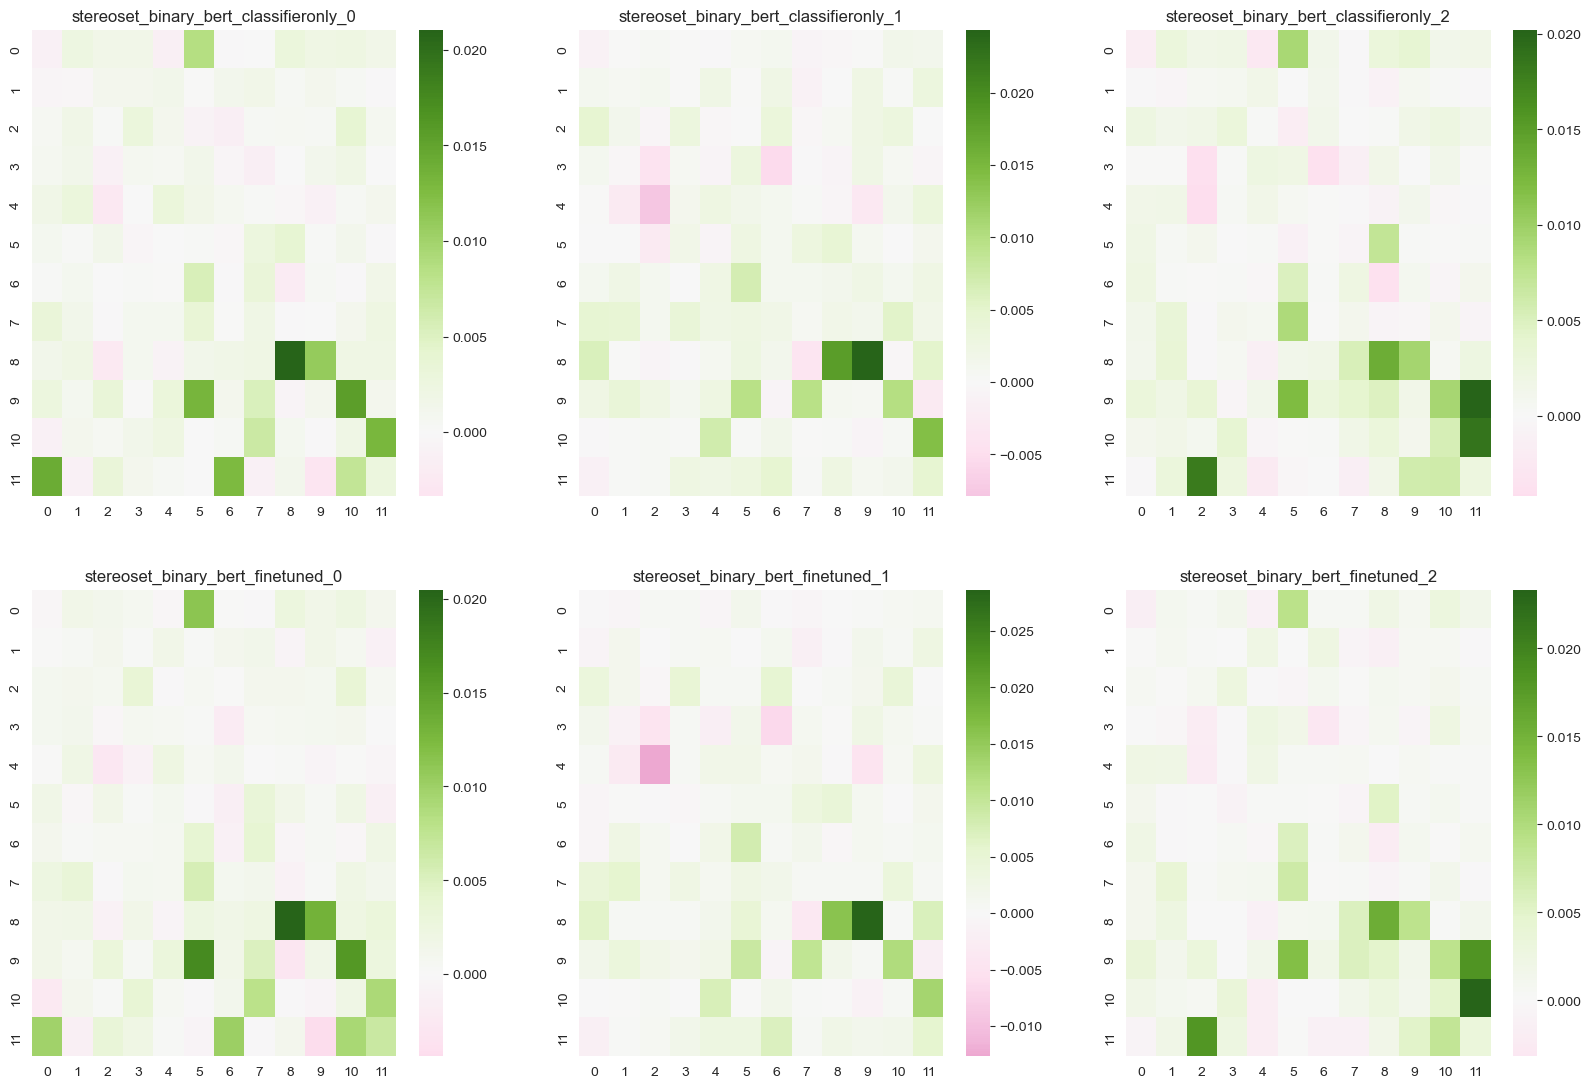

In [28]:
fig = plt.figure(figsize=(20, 20*2/3))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints_random_seed):
    for j, suffix in enumerate(suffixes_random_seed):
        ax = fig.add_subplot(len(checkpoints), len(suffixes), len(suffixes)*i+j+1)
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.heatmap(np.array(data_random_seed[f"{checkpoint}_{suffix}"]["100"]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0)
plt.show()

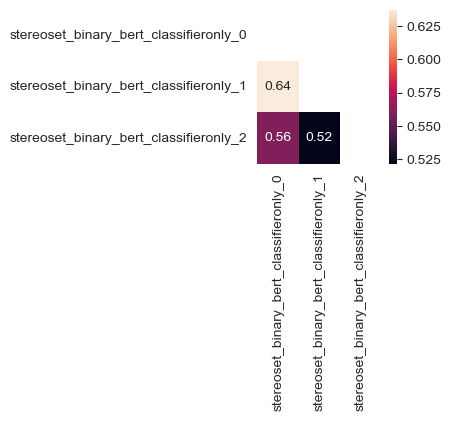

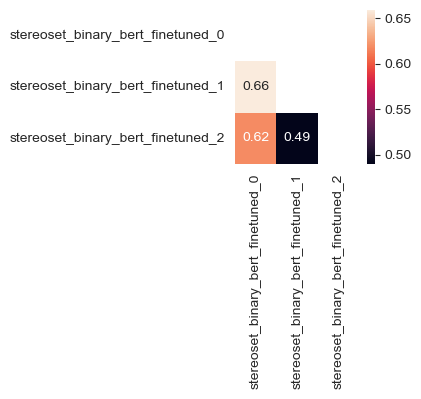

In [43]:
for i, checkpoint in enumerate(checkpoints_random_seed):
    fig = plt.figure(figsize=(2, 2))
    df = pd.DataFrame({f"{checkpoint}_{suffix}": data_random_seed[f"{checkpoint}_{suffix}"]["100"]["contribs"] for suffix in suffixes_random_seed})
    mask = np.triu(np.ones((3,3)))
    sns.heatmap(df.corr(), mask=mask, annot=True)
    plt.show()

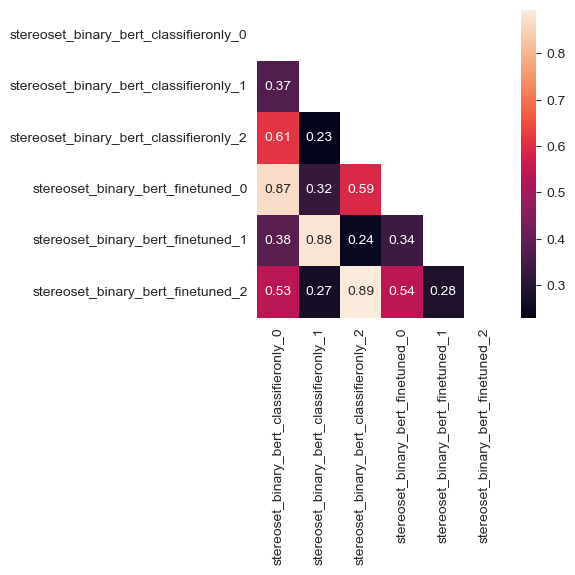

,stereoset_binary_bert_classifieronly_0,stereoset_binary_bert_classifieronly_1,stereoset_binary_bert_classifieronly_2,stereoset_binary_bert_finetuned_0,stereoset_binary_bert_finetuned_1,stereoset_binary_bert_finetuned_2
stereoset_binary_bert_classifieronly_0,1.000000,0.641384,0.588179,0.945333,0.623375,0.602735
stereoset_binary_bert_classifieronly_1,0.641384,1.000000,0.460625,0.642076,0.966119,0.487756
stereoset_binary_bert_classifieronly_2,0.588179,0.460625,1.000000,0.596588,0.457054,0.969100
stereoset_binary_bert_finetuned_0,0.945333,0.642076,0.596588,1.000000,0.635879,0.613874
stereoset_binary_bert_finetuned_1,0.623375,0.966119,0.457054,0.635879,1.000000,0.463939
stereoset_binary_bert_finetuned_2,0.602735,0.487756,0.969100,0.613874,0.463939,1.000000


In [30]:
fig = plt.figure(figsize=(4, 4))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
df = pd.DataFrame({f"{checkpoint}_{suffix}": data_random_seed[f"{checkpoint}_{suffix}"]["100"]["contribs"] for (checkpoint, suffix) in itertools.product(checkpoints_random_seed, suffixes_random_seed)})
mask = np.triu(np.ones((len(df.columns),len(df.columns))))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(df.corr(method="spearman"), mask=mask, annot=True)
plt.show()
df.corr()

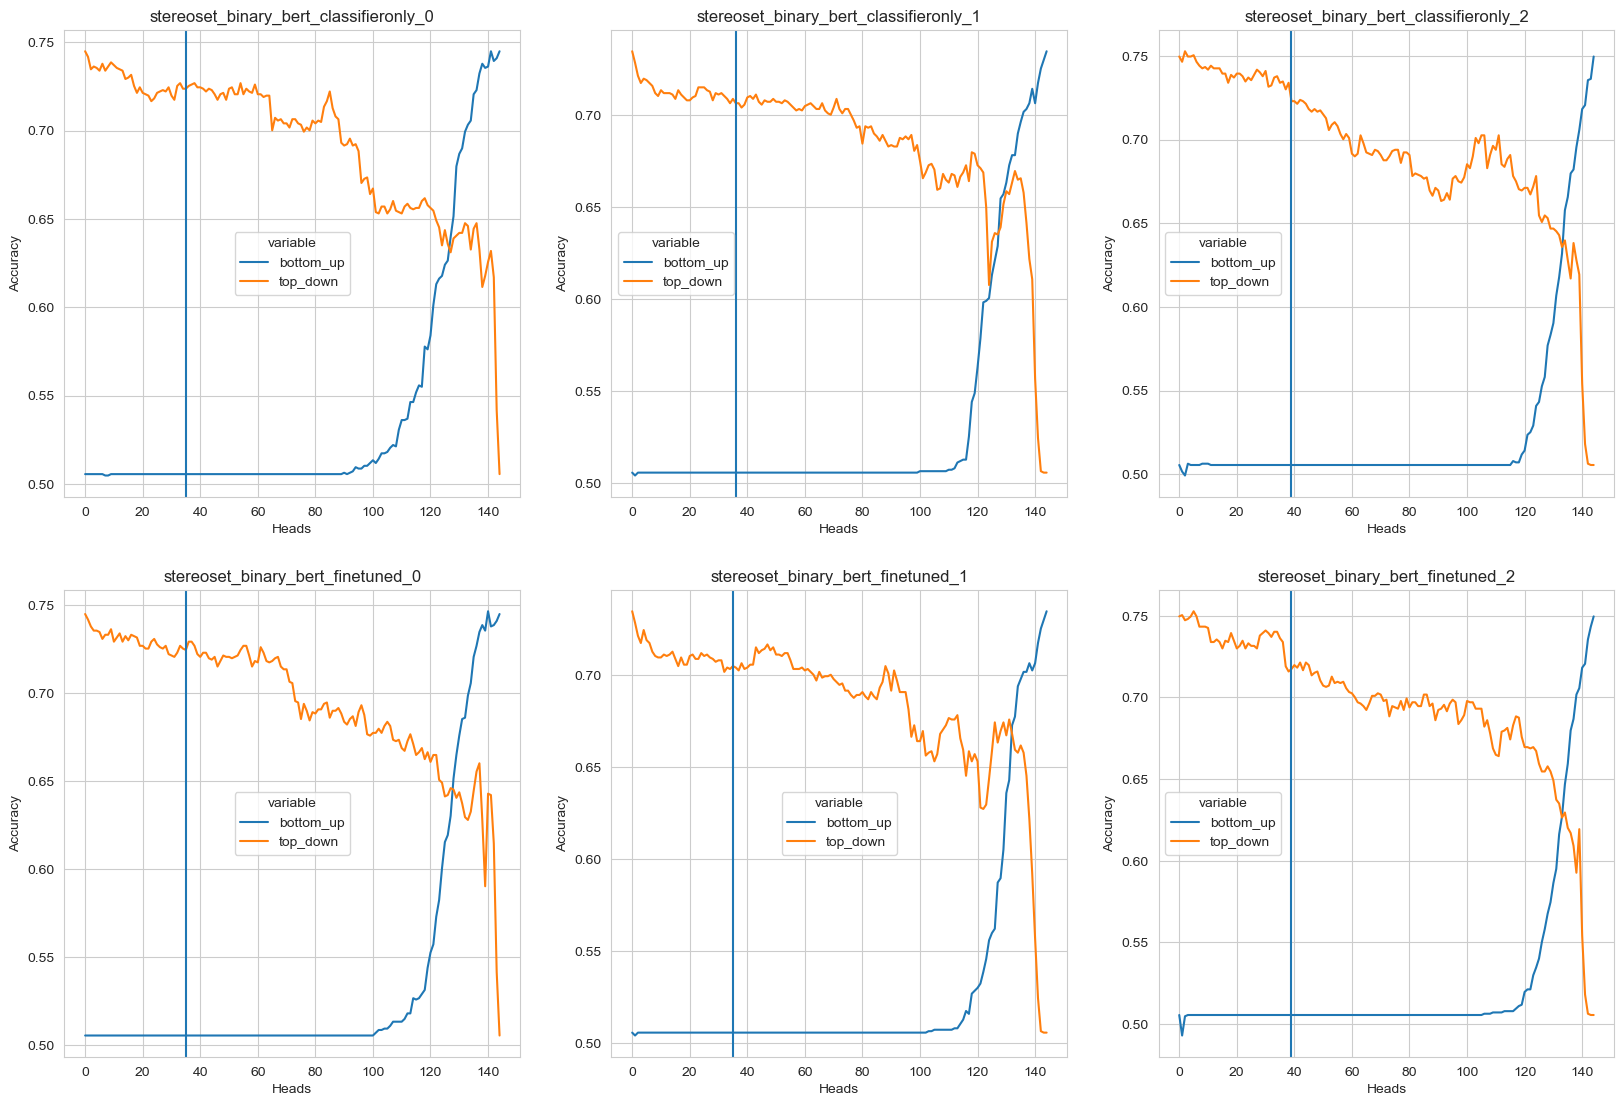

In [31]:
fig = plt.figure(figsize=(20, 20*2/3))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints_random_seed):
    for j, suffix in enumerate(suffixes_random_seed):
        ax = fig.add_subplot(len(checkpoints_random_seed), len(suffixes_random_seed), len(suffixes_random_seed)*i+j+1)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up': data_random_seed[f"{checkpoint}_{suffix}"]["100"]["bottom_up_results"],
            'top_down': data_random_seed[f"{checkpoint}_{suffix}"]["100"]["top_down_results"]
        })
        contribs = np.asarray(data_random_seed[f"{checkpoint}_{suffix}"]["100"]["contribs"])
        vline = (contribs < 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)
plt.show()

In [32]:
for i, checkpoint in enumerate(checkpoints_random_seed):
    for j, suffix in enumerate(suffixes_random_seed):
        contribs = np.asarray(data_random_seed[f"{checkpoint}_{suffix}"]["100"]["contribs"])
        top10 = np.argsort(contribs)[:10]
        tmp = np.zeros_like(contribs)
        tmp[top10] = contribs[top10]
        bottom10 = np.argsort(contribs)[-10:]
        tmp[bottom10] = contribs[bottom10]
        data_random_seed[f"{checkpoint}_{suffix}"]["100"]["contribs"] = tmp

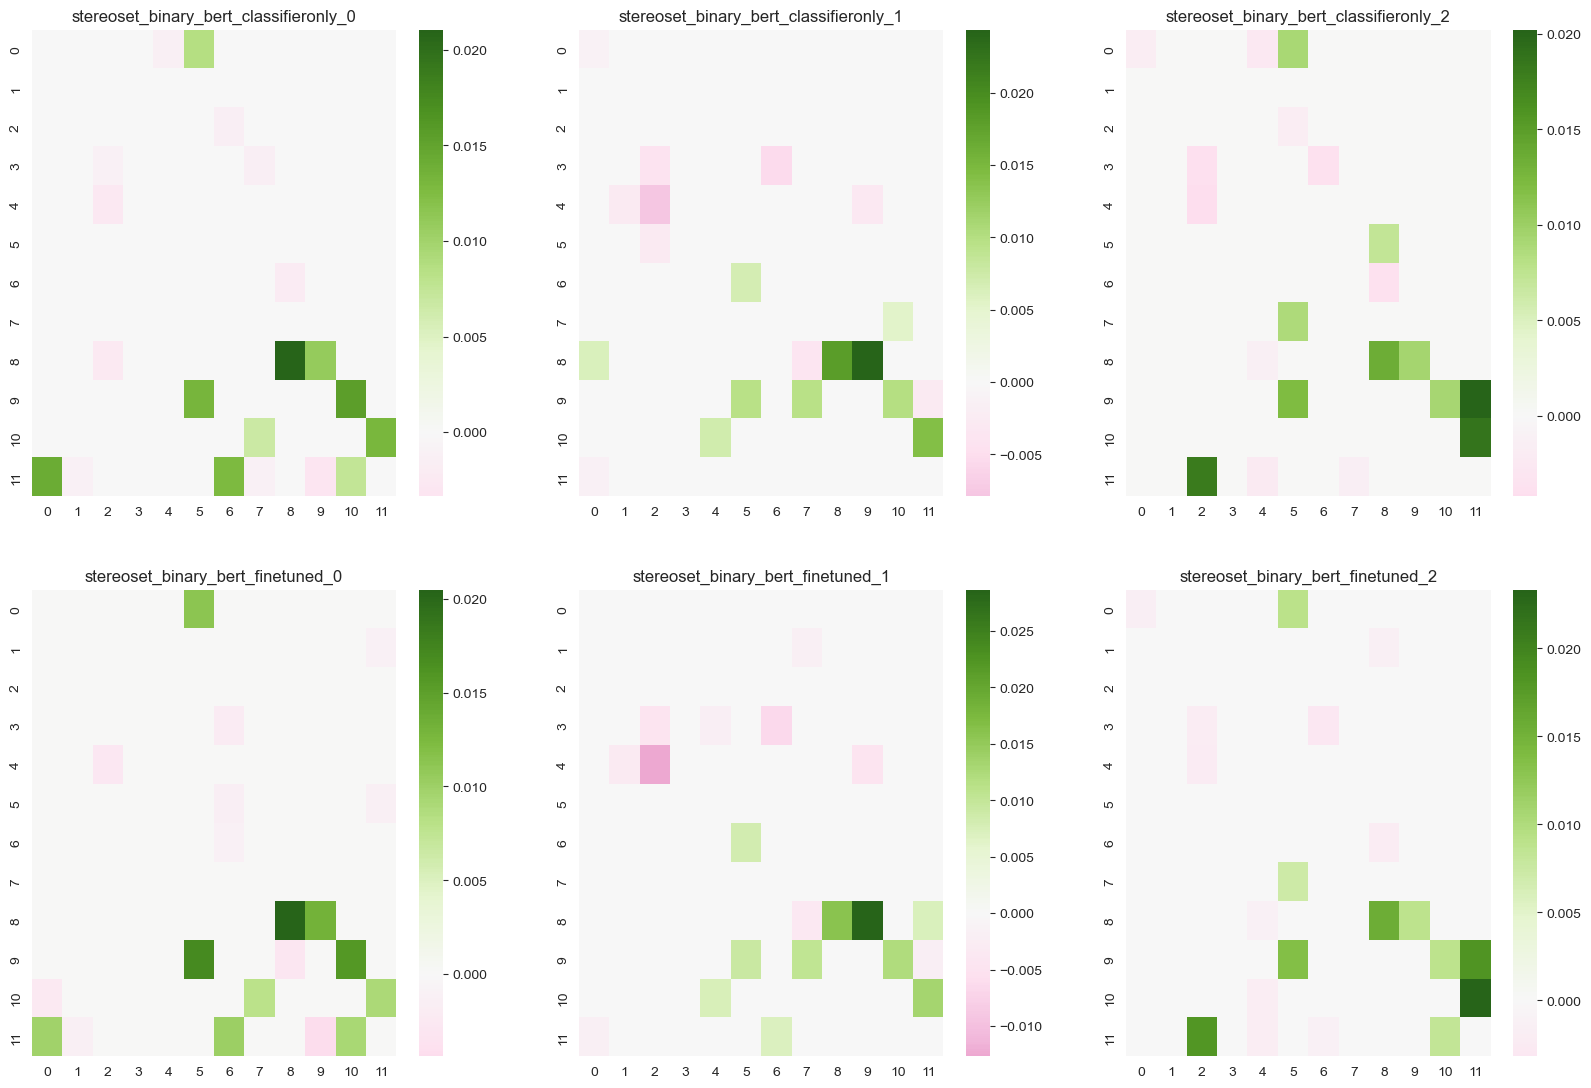

In [33]:
fig = plt.figure(figsize=(20, 20 * 2 / 3))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints_random_seed):
    for j, suffix in enumerate(suffixes_random_seed):
        ax = fig.add_subplot(len(checkpoints), len(suffixes), len(suffixes) * i + j + 1)
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.heatmap(np.array(data_random_seed[f"{checkpoint}_{suffix}"]["100"]["contribs"]).reshape(12, 12), ax=ax,
                    cmap="PiYG", center=0)
plt.show()

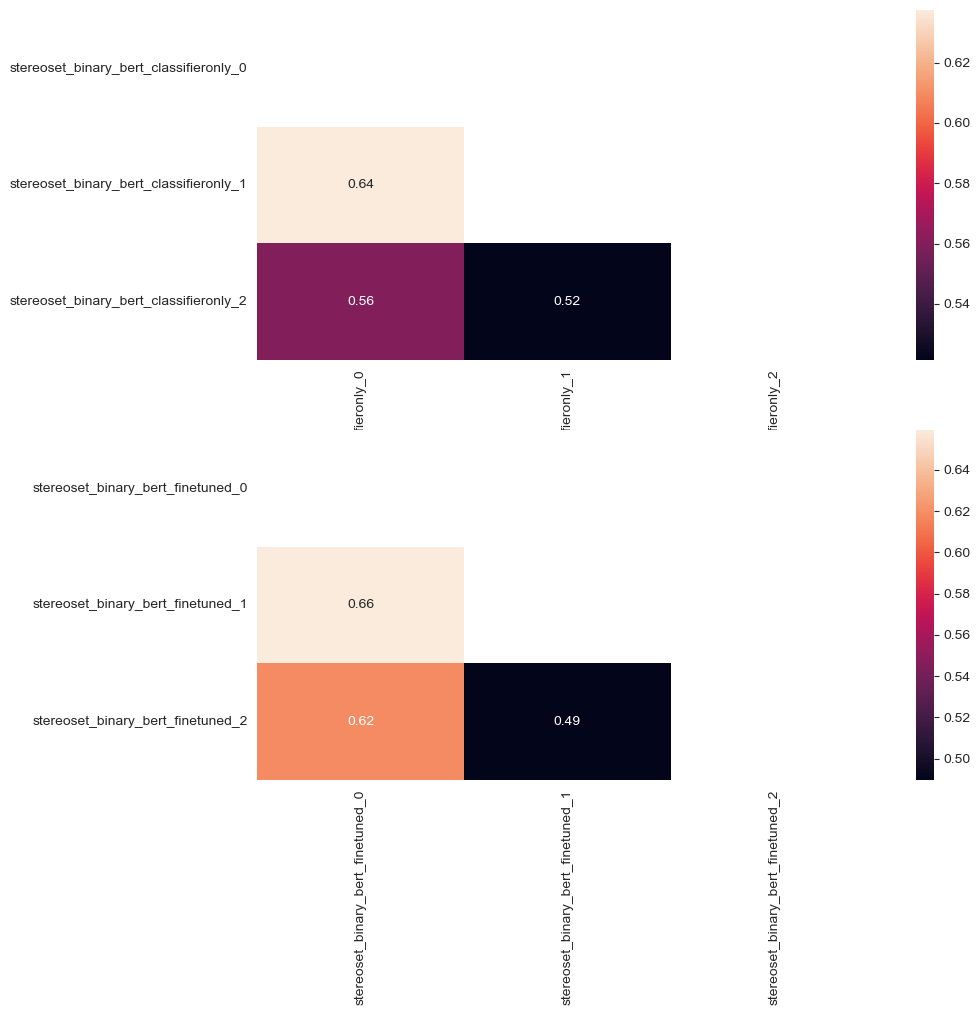

In [34]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints_random_seed):
    df = pd.DataFrame(
        {f"{checkpoint}_{suffix}": data_random_seed[f"{checkpoint}_{suffix}"]["100"]["contribs"] for suffix in
         suffixes_random_seed})
    mask = np.triu(np.ones((3, 3)))
    ax = fig.add_subplot(len(checkpoints), 1, i + 1)
    sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

Set all but top 20 and bottom 20 to 0 and recalculate correlations (for random seed effect on training)
Change random seeds to affect shapley-based probing only, not model training
Work on Winobias and Crows-Pairs